# Лабораторная работа №1. Шут Артём

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from prettytable import PrettyTable as pt

## Задание 1

### Метод Половинного деления

In [2]:
def half_divide_method(f, a, b, n): # функция, левая и правая границы, кол-во итераций
    mid = (a + b) / 2
    if n == 0:
        return mid
    if f(mid) * f(a) < 0:
        return half_divide_method(f, a, mid, n - 1)
    if f(mid) * f(b) < 0:
        return half_divide_method(f, mid, b, n - 1)

### Метод Хорд

In [3]:
def chord_method(f, a, b, n): 
    next = a - (b - a) * f(a) / (f(b) - f(a))
    if n == 0:
        return next
    return chord_method(f, next, b, n - 1)

### Метод Ньютона

In [4]:
def newtons_method(f, d, x, n): # f - функция, d - дифференциал функции
    next = x - f(x) / d(x)
    if n == 0:
        return next
    return newtons_method(f, d, next, n - 1)

### Определение функции и её дифференциала в точке

In [5]:
def function(x):
    return x - 2 * math.exp(-x)

def diff(x):
    return 1 + 2 * math.exp(-x)

### Вычисления

In [6]:
print(half_divide_method(function, 0, 1, 3))
print(function(0.8125))
print(chord_method(function, 0, 1, 3))
print(function(0.8526043633269464))
print(newtons_method(function, diff, 1, 3))
print(function(0.8526055020137255))

0.8125
-0.07499462016215974
0.8526043633269464
-2.1095379446611773e-06
0.8526055020137255
1.1102230246251565e-16


### Метод Стеффенсена (Scilab)

```javascript
function [out] = Fun(x)
    out = x - 2 * exp(-x)
endfunction

function [Xs]=SteffensenRoot(Fun,Xest)
    count = 0;
    E = 1.0;
    while E > 1e-6 & count < 100
        Xs = Xest - Fun(Xest) * Fun(Xest) / (Fun(Xest + Fun(Xest)) - Fun(Xest))
        count = count + 1
        E = abs((Xs - Xest) / Xs)
        Xest = Xs
    end
    if count >=100 then Xs = -1
    end
endfunction

Xs = SteffensenRoot(Fun,1)
```

Результат: 0.8526055

### Метод Стеффенсена (Python)

In [7]:
def steffensens_method(f, x):
    E = 0.000001
    for i in range(100):
        prev = x
        x = prev - f(prev) * f(prev) / (f(prev + f(prev)) - f(prev))
        if np.abs(x - prev) < E:
            return x
    return None

print('Результат: ', steffensens_method(function,100))

Результат:  0.8526055020137254


Результаты, полученные применением этого метода в Python и в Scilab совпадают с точностью до $10^{-6}$

## Задание 2

Для повышения читаемости и упрощения описания решения обозначим $T_h$ как $T$, $T_c$ как $t$, $J_h$ как $J$, $J_c$ как $j$.

$$\begin{equation}
    \begin{matrix} 
    t = (\frac{j - 17.41*t + 5188.18}{5.67*10^{-8}})^{\frac{1}{4}}, \\
    T = (\frac{2250 + J - 1.865 * T}{5.67*10^{-8}})^{\frac{1}{4}}, \\
    j = 2352.71 + 0.71*J - 7.46*t, \\
    J = 11093 + 0.71*j - 7.46*T. \\
    \end{matrix} 
\end{equation}$$

#### Якобиан имеет вид:
$$\begin{equation}
    \begin{pmatrix}  
    2.79*10^2*(j-17.41*t + 5188.8)^{-0.75} & 0 & 0.16*10^2*(j-17.41*t+5188.8)^{-0.75} & 0 \\
    0 & -0.29*10^2*(2250+J-1.865*t)^{-0.75} & 0 & 0.16*10^2*(2250+J-1.865*t)^{-0.75} \\
    -7.46 & 0 & 0 & 0.71 \\
    0 & -7.46 & 0.71 & 0
    \end{pmatrix} 
\end{equation}$$

Достаточным условием сходимости является то, что сумма модулей производных по строкам Якобиана должна быть меньше 1 (в каждой строке). В 3-4 строках она не соблюдатся, но если мы введём подстановку $J_c = J * c$, $j_c = j * c$, где $c < \frac{1 - 0.71}{7.46}$, то соблюдётся, и для получения области сходимости надо будет только проконтролировать соблюдение условия, что сумма модулей производных Якобиана в 1 и 2 строках должна быть меньше 1.

In [8]:
T_hist = [298]
t_hist = [298]
J_hist = [5000]
j_hist = [3000]
for i in range(100):
    T_hist.append(((2250 + J_hist[i] - 1.865 * T_hist[i]) / 5.67e-8) ** (1 / 4))
    t_hist.append(((j_hist[i] - 17.41 * t_hist[i] + 5188.18) / 5.67e-8) ** (1 / 4))
    J_hist.append(11093 + 0.71 * j_hist[i] - 7.46 * T_hist[i])
    j_hist.append(2352.71 + 0.71 * J_hist[i] - 7.46 * t_hist[i])
print('Th = ', T_hist[100], '\nTc = ',t_hist[100], '\nJh = ', J_hist[100], '\nJc = ', j_hist[100])    

Th =  671.1239779386548 
Tc =  481.0272546990047 
Jh =  10504.194933130066 
Jc =  6222.2250824538205


Text(0.5, 1.0, 'Jc')

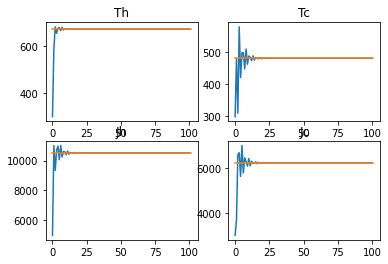

In [9]:
import pylab
x = range(101)

pylab.subplot(2, 2, 1)
pylab.plot(x, T_hist)
plt.plot([0, len(x)], [671]*2)
pylab.title("Th")

pylab.subplot(2, 2, 2)
pylab.plot(x, t_hist)
plt.plot([0, len(x)], [481]*2)
pylab.title("Tc")

pylab.subplot(2, 2, 3)
pylab.plot(x, J_hist)
plt.plot([0, len(x)], [10504]*2)
pylab.title("Jh")

pylab.subplot(2, 2, 4)
pylab.plot(x, j_hist)
plt.plot([0, len(x)], [6222]*2)
pylab.title("Jc")

## Задание 3

Решим задачу из механики. Тело бросают с высоты с начальной скоростью паралленьно земле, тело падает на расстоянии s = 15 м, за секунду до падения тело имело скорость u = 12.5 м/с. Какое было полное время полёта тела? (Ускорение свободного падения принять равным g = 10 м/с^2).

Мы, конечно, можем запариться, найти промежуток, где выполняются условия Фурье и где можно использовать метод Ньютона, но это очень сложно, и мы можем просто обратить внимание вот на что: наша функция раскладываетс яв полином, а. значит, она и её первые 2 производные непрерывны и, мы можем определить, точно больше нуля на $x \in [2.2, Inf)$. Тсть, т.е. если решение есть, то мы точно получим его, применив метод Ньютона к нему, взяв начальную точку >2.2.

Ответ:  2.000000000082732 с


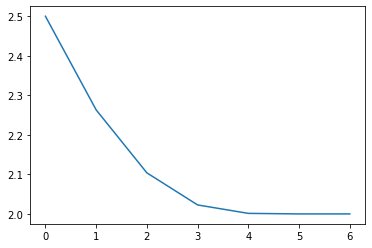

In [10]:
def newtons_method(f, d, x, n, h): # f - функция, d - дифференциал функции
    h.append(x)
    next = x - f(x) / d(x)
    if n == 0:
        h.append(next)
        return next
    return newtons_method(f, d, next, n - 1, h)

def function(x):
    return 15**2 + (100 * (x - 1)**4 - 12.5**2) * x**2
def diff(x):
    return (400 * (x - 1)**3) * x**2 + 2 * x * (100 * (x - 1)**4 - 12.5**2)

hist = []
print('Ответ: ', newtons_method(function, diff, 2.5, 5, hist), 'с')
plt.plot(range(len(hist)),hist)
plt.show()


print()

## Задание 4

$$F(x) = 2 * x^3 - 4 * x^2 - 4 * x - 20 = 0, x \in [3,4] $$
Решать будем методом Ньютона (касательных), точкой начального приближения выберем 3.5, т.к. выполняются условия Фурье на [3,4] и F(x) = 0 определена и непрерывна на [3,4]. Кроме того, область начального приближения достаточна мала, а метод Ньютона имеет квадратичную сходимость.

Решение после 4-х итераций = 3.4318475224198943


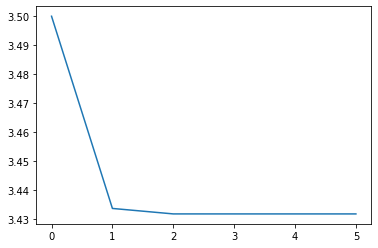

In [11]:
def newtons_method(f, d, x, n, h): # f - функция, d - дифференциал функции
    h.append(x)
    next = x - f(x) / d(x)
    if n == 0:
        h.append(next)
        return next
    return newtons_method(f, d, next, n - 1, h)

def function(x):
    return 2 * x**3 - 4 * x**2 - 4 * x - 20
def deff(x):
    return 6 * x**2 - 8 * x - 4

hist = []
print('Решение после 4-х итераций =', newtons_method(function, deff, 3.5, 4, hist))
plt.plot(range(len(hist)),hist)
plt.show()

## Задание 5. Вариант 24.

Решим уравнение:
$$ cos(\frac{x}{2}) ln(x - 1) = 0. $$
На самом деле, мы не можем его решить численными методами в том смысле, что найти все его корни (их бесконечно много), но если мы ограничим промежуток, подходящий под требования метода ньютона, то можно будет найти и решение на этом промежутке

In [12]:
def MyFunction(x):
    return math.cos(x / 2) * math.log(x - 1)

def MyDerivative(x):
    return math.cos(x / 2) / (x - 1) - math.sin(x / 2) * math.log(x - 1) / 2

def MyNewton(f, d, x):
    limit = 100
    hist = [x]
    E = 1e-16
    e = 1.0
    while e > E:
        if limit == 0:
            return ['Too many iterations']
        hist.append(hist[-1] - f(hist[-1]) / d(hist[-1]))
        e = abs(hist[-1] - hist[-2])
        limit -= 1
    return hist

def MyIteration(f, d, x):
    hist = [x]
    limit = 100
    E = 1e-16
    e = 1
    C = d(x)
    if C == 0:
        return ['d(x) = 0']
    while e > E:
        if limit == 0:
            return ['Too many iterations']
        hist.append(hist[-1] - f(hist[-1]) / C)
        e = abs(hist[-2] - hist[-1])
        limit -= 1
    return hist

In [13]:
newton = MyNewton(MyFunction, MyDerivative, 90)
iterator = MyIteration(MyFunction, MyDerivative, 90)
table = pt()
n = max(len(newton),len(iterator))
table.add_column("n", range(n))
table.add_column("Newton", newton + (n - len(newton))*[''])
table.add_column("Iteration", iterator)

print(table)
with open("output.txt", "w") as file:
    file.write(table.get_string())

+----+-------------------+-------------------+
| n  |       Newton      |     Iteration     |
+----+-------------------+-------------------+
| 0  |         90        |         90        |
| 1  | 91.23856741100367 | 91.23856741100367 |
| 2  | 91.10603653347306 | 91.08214249659416 |
| 3  | 91.10618695416008 | 91.11056330021454 |
| 4  |  91.106186954104  | 91.10538992967547 |
| 5  |  91.106186954104  | 91.10633209768042 |
| 6  |                   | 91.10616052206728 |
| 7  |                   |  91.1061917676181 |
| 8  |                   |  91.1061860775189 |
| 9  |                   | 91.10618711373819 |
| 10 |                   | 91.10618692503316 |
| 11 |                   | 91.10618695939807 |
| 12 |                   | 91.10618695313991 |
| 13 |                   | 91.10618695427958 |
| 14 |                   | 91.10618695407203 |
| 15 |                   | 91.10618695410983 |
| 16 |                   | 91.10618695410294 |
| 17 |                   |  91.1061869541042 |
| 18 |       

In [14]:
newton = MyNewton(MyFunction, MyDerivative, 3)
iterator = MyIteration(MyFunction, MyDerivative, 3)
table = pt()
n = max(len(newton),len(iterator))
table.add_column("n", range(n))
table.add_column("Newton", newton + (n - len(newton))*[''])
table.add_column("Iteration", iterator)

print(table)
with open("output.txt", "w") as file:
    file.write(table.get_string())

+----+--------------------+--------------------+
| n  |       Newton       |     Iteration      |
+----+--------------------+--------------------+
| 0  |         3          |         3          |
| 1  | 3.1579937959633964 | 3.1579937959633964 |
| 2  | 3.141752765515382  | 3.1376686652805263 |
| 3  | 3.1415926693037304 | 3.1424716953050584 |
| 4  | 3.1415926535897936 | 3.1413925536982874 |
| 5  | 3.141592653589793  | 3.141638040734686  |
| 6  | 3.141592653589793  | 3.141582350384359  |
| 7  |                    | 3.1415949920592077 |
| 8  |                    | 3.1415921228162995 |
| 9  |                    | 3.141592774060825  |
| 10 |                    | 3.141592626246113  |
| 11 |                    | 3.1415926597960695 |
| 12 |                    | 3.1415926521811364 |
| 13 |                    | 3.1415926539095205 |
| 14 |                    | 3.1415926535172236 |
| 15 |                    | 3.1415926536062644 |
| 16 |                    | 3.1415926535860548 |
| 17 |              

In [15]:
newton = MyNewton(MyFunction, MyDerivative, 15)
iterator = MyIteration(MyFunction, MyDerivative, 15)
table = pt()
n = max(len(newton),len(iterator))
table.add_column("n", range(n))
table.add_column("Newton", newton + (n - len(newton))*[''])
table.add_column("Iteration", iterator)

print(table)
with open("output.txt", "w") as file:
    file.write(table.get_string())

+----+--------------------+--------------------+
| n  |       Newton       |     Iteration      |
+----+--------------------+--------------------+
| 0  |         15         |         15         |
| 1  | 15.754181374703954 | 15.754181374703954 |
| 2  | 15.708008786634045 | 15.70290747691779  |
| 3  | 15.70796326800136  | 15.708509558155328 |
| 4  | 15.707963267948966 | 15.707904153575013 |
| 5  | 15.707963267948966 | 15.707969663746795 |
| 6  |                    | 15.707962575952733 |
| 7  |                    | 15.707963342819674 |
| 8  |                    | 15.70796325984831  |
| 9  |                    | 15.707963268825418 |
| 10 |                    | 15.707963267854138 |
| 11 |                    | 15.707963267959226 |
| 12 |                    | 15.707963267947855 |
| 13 |                    | 15.707963267949086 |
| 14 |                    | 15.707963267948953 |
| 15 |                    | 15.707963267948967 |
| 16 |                    | 15.707963267948966 |
| 17 |              

In [16]:
newton = MyNewton(MyFunction, MyDerivative, 910)
iterator = MyIteration(MyFunction, MyDerivative, 910)
table = pt()
n = max(len(newton),len(iterator))
table.add_column("n", range(n))
table.add_column("Newton", newton  + (n - len(newton))*[''])
table.add_column("Iteration", iterator + (n - len(iterator))*[''])

print(table)
with open("output.txt", "w") as file:
    file.write(table.get_string())

+---+-------------------+---------------------+
| n |       Newton      |      Iteration      |
+---+-------------------+---------------------+
| 0 |        910        | Too many iterations |
| 1 | 906.5957235457139 |                     |
| 2 | 908.1556368422472 |                     |
| 3 | 907.9191934177409 |                     |
| 4 | 907.9202768877464 |                     |
| 5 | 907.9202768874502 |                     |
| 6 | 907.9202768874502 |                     |
+---+-------------------+---------------------+


## Задание 6

Решим систему:
\begin{cases} 
    F \equiv tg(xy + 1) - x^2 = 0 \\ 
    G \equiv 3x^2 + 2y^2 - 1 = 0
\end{cases}

In [17]:
def F(x, y):
    return math.tan(x * y + 1) - x**2

def G(x, y):
    return 3 * x**2 + 2 * y**2 - 1

def F_x(x, y):
    return y / (math.cos(x * y + 1))**2 - 2 * x

def F_y(x, y):
    return x / (math.cos(x * y + 1))**2

def G_x(x, y):
    return 6 * x

def G_y(x, y):
    return 4 * y

def J(x, y):
    return F_x(x, y) * G_y(x, y) - F_y(x, y) * G_x(x, y)

def D_x(x, y):
    return F(x, y) * G_y(x, y) - F_y(x, y) * G(x, y)

def D_y(x, y):
    return F_x(x, y) * G(x, y) - F(x, y) * G_x(x, y)


Суть метода Ньютона в том, что мы последовательно находим $\delta x$  и  $\delta y$ и корректируем значение нашего приближения. Сведём нашу систему нелинейных уравнений к последовательности систем линейных уравнений, и решать их будем методом Гаусса.

In [18]:
def newtons_method(x, y):
    limit = 100
    X = [x]
    Y = [y]
    for i in range(1, 100):
        j = J(X[-1], Y[-1])
        dx = D_x(X[-1], Y[-1]) / j
        dy = D_y(X[-1], Y[-1]) / j
        X.append(X[-1] + dx)
        Y.append(Y[-1] + dy)
        if math.sqrt(dx**2 + dy**2) < 1e-16:
            return (X, Y)
    
    return (None, None)

In [19]:
(X, Y) = newtons_method(1, 1)
if X != None:
    table = pt()
    table.add_column("n", range(len(X)))
    table.add_column("X", X)
    table.add_column("Y", Y)

    print(table)
    with open("output_.txt", "w") as file:
        file.write(table.get_string())
else:
    print(X)

None


Наша система, к сожалению, не имеет решений.